Enter image path (or 'q' to quit):  top_view/a1.jpg


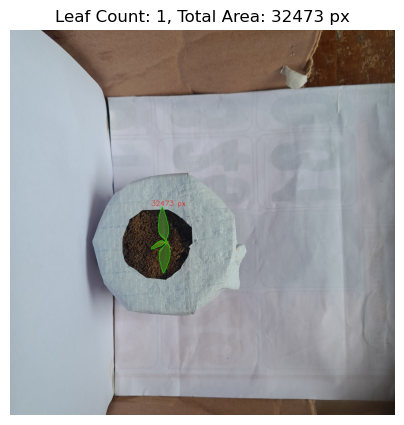

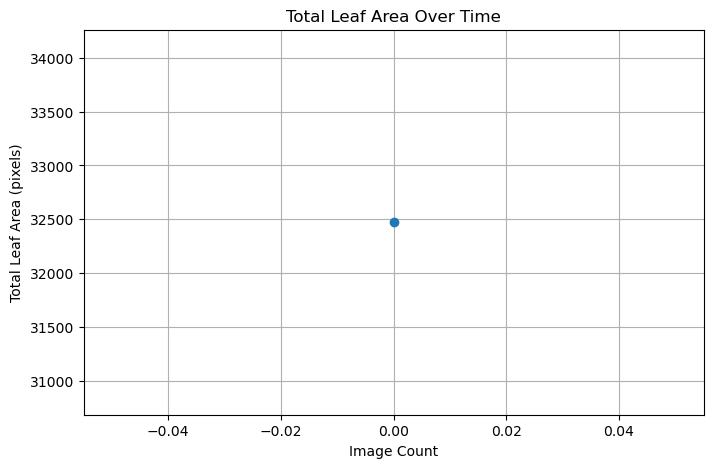

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 32473 pixels
Total area of leaves: 32473 pixels


Enter image path (or 'q' to quit):  top_view/a2.jpg


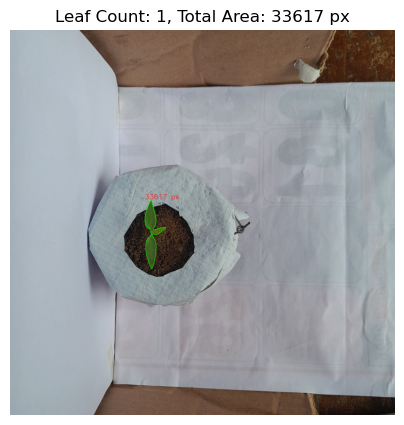

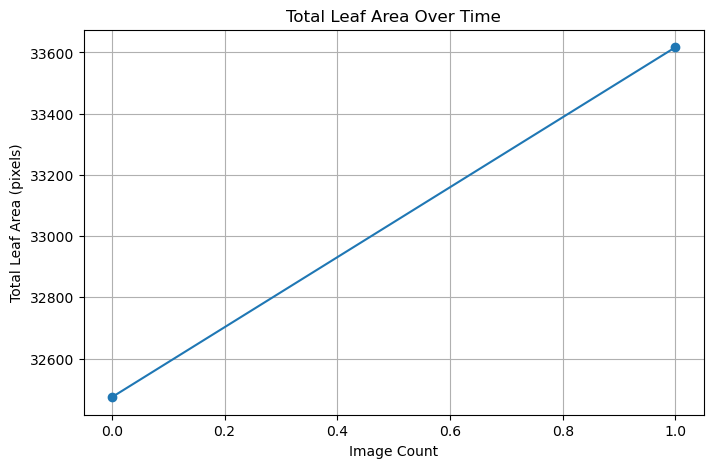

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 33617 pixels
Total area of leaves: 33617 pixels


Enter image path (or 'q' to quit):  top_view/a3.jpg


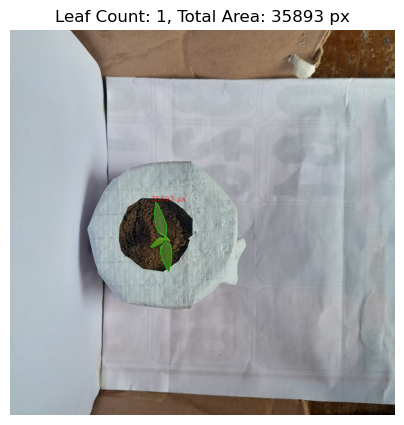

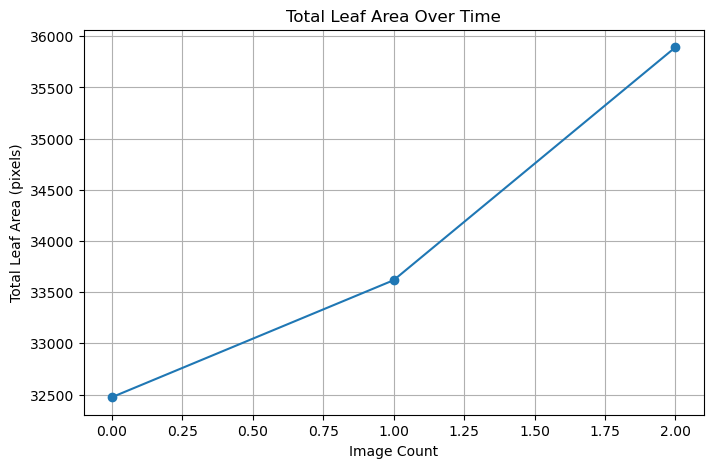

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 35893 pixels
Total area of leaves: 35893 pixels


Enter image path (or 'q' to quit):  top_view/a3.jpg


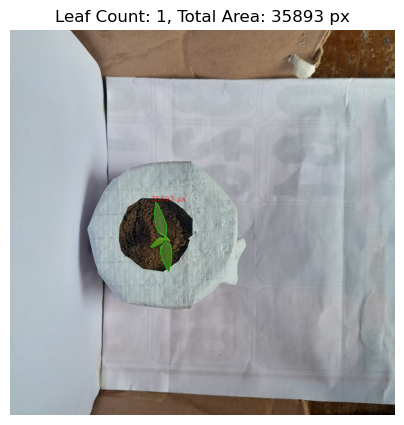

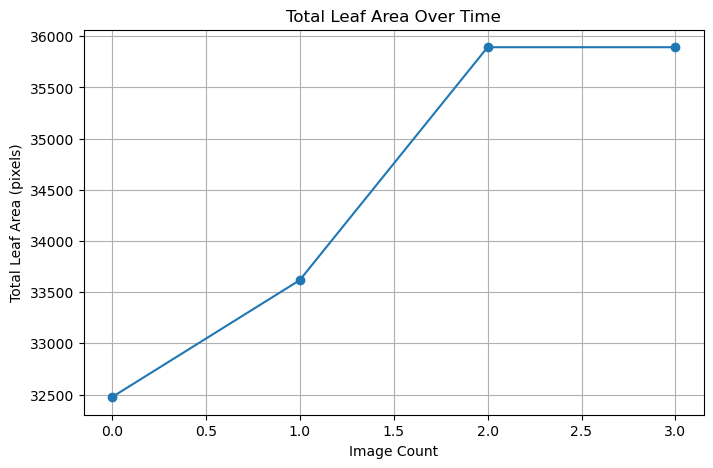

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 35893 pixels
Total area of leaves: 35893 pixels


Enter image path (or 'q' to quit):  top_view/a4.jpg


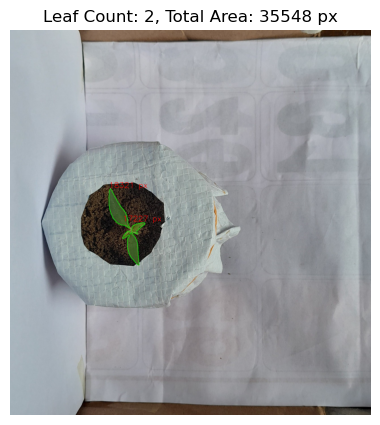

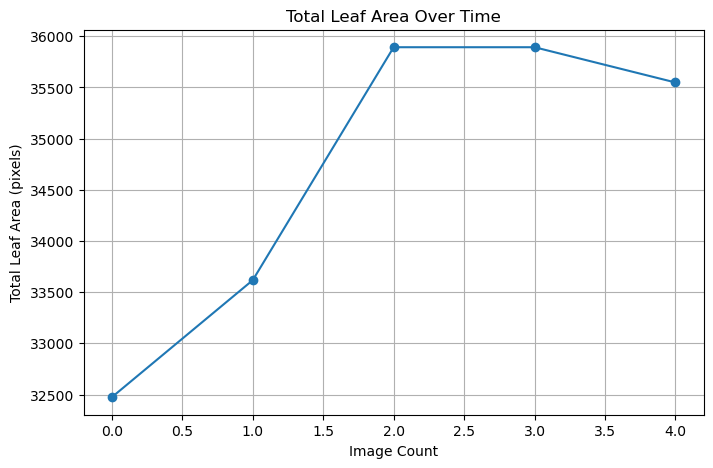

Total number of leaves detected: 2
Areas of individual leaves:
Leaf 1: 17227 pixels
Leaf 2: 18321 pixels
Total area of leaves: 35548 pixels


Enter image path (or 'q' to quit):  top_view/a5.jpg


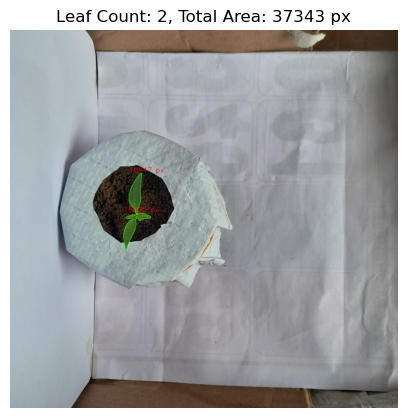

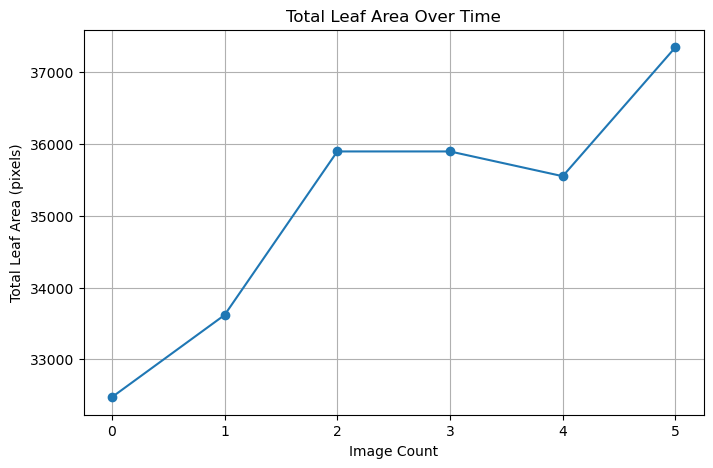

Total number of leaves detected: 2
Areas of individual leaves:
Leaf 1: 18895 pixels
Leaf 2: 18447 pixels
Total area of leaves: 37343 pixels


Enter image path (or 'q' to quit):  top_view/a6.jpg


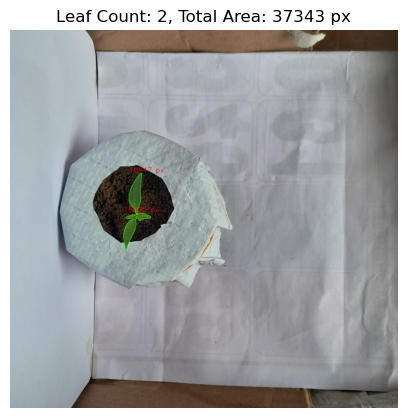

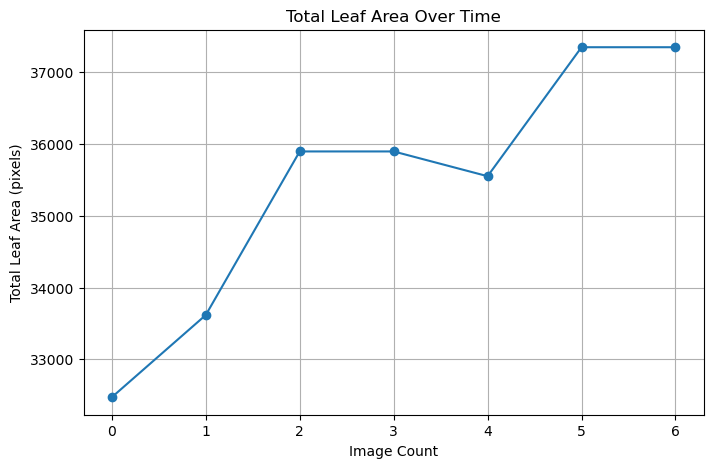

Total number of leaves detected: 2
Areas of individual leaves:
Leaf 1: 18895 pixels
Leaf 2: 18447 pixels
Total area of leaves: 37343 pixels


Enter image path (or 'q' to quit):  top_view/a7.jpg


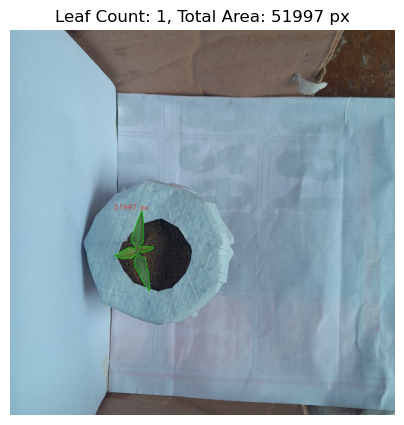

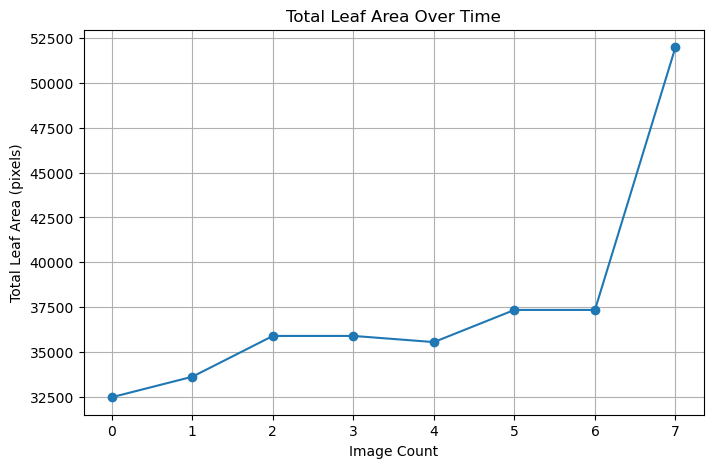

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 51997 pixels
Total area of leaves: 51997 pixels


Enter image path (or 'q' to quit):  top_view/a8.jpg


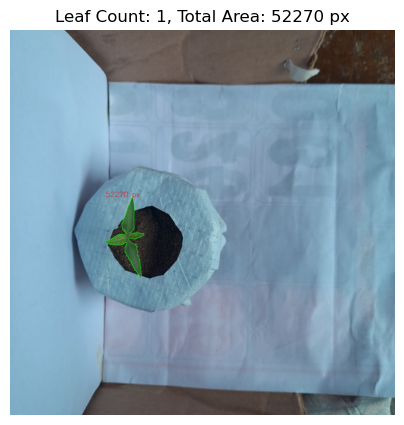

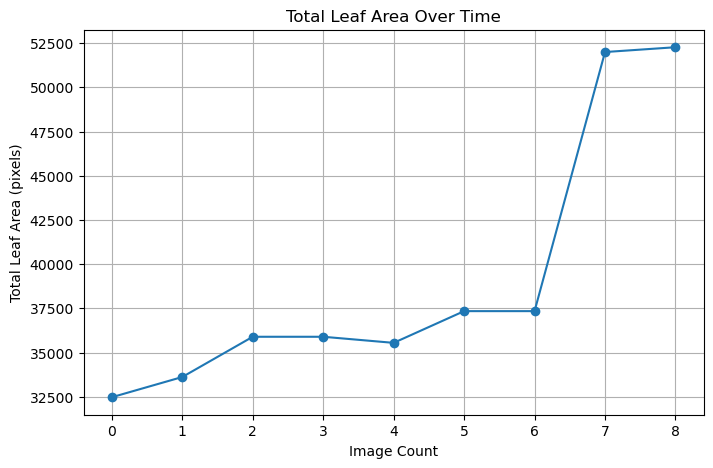

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 52270 pixels
Total area of leaves: 52270 pixels


Enter image path (or 'q' to quit):  top_view/a9.jpg


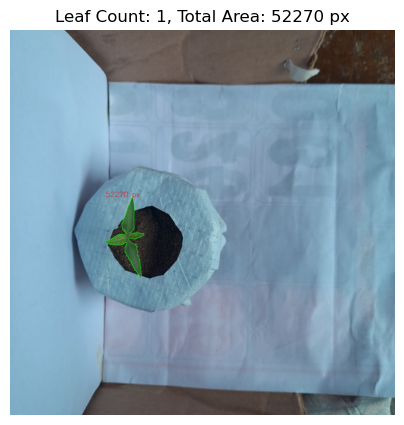

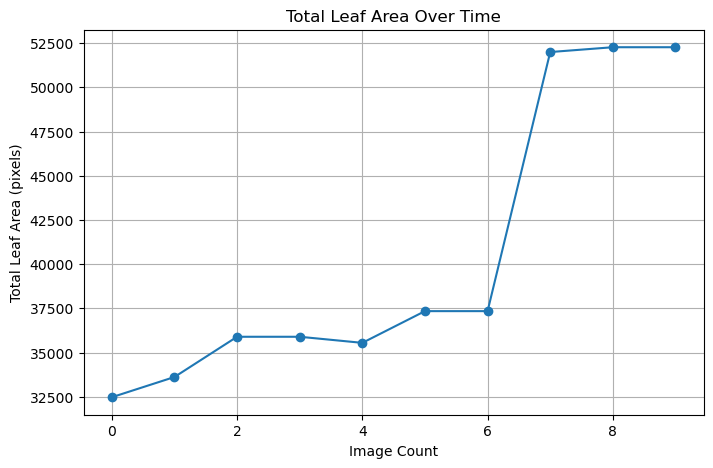

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 52270 pixels
Total area of leaves: 52270 pixels


Enter image path (or 'q' to quit):  top_view/a9.jpg


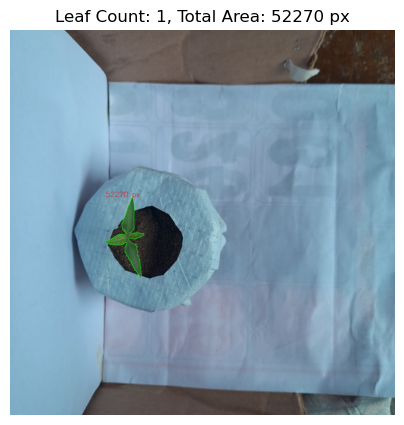

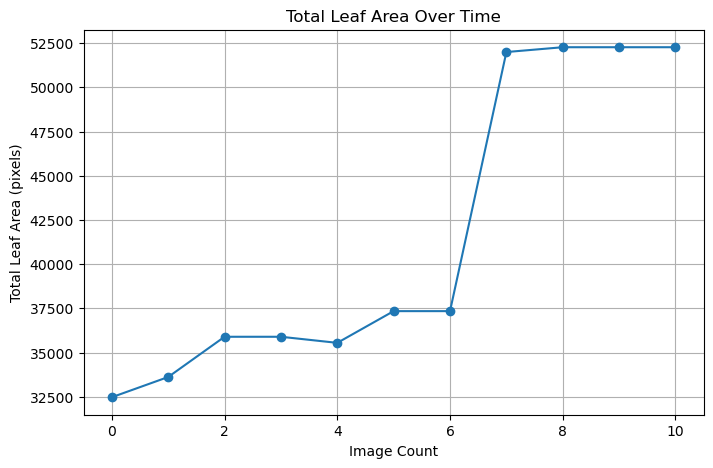

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 52270 pixels
Total area of leaves: 52270 pixels


Enter image path (or 'q' to quit):  top_view/a11.jpg


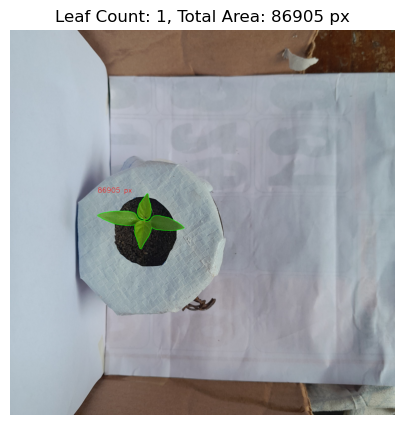

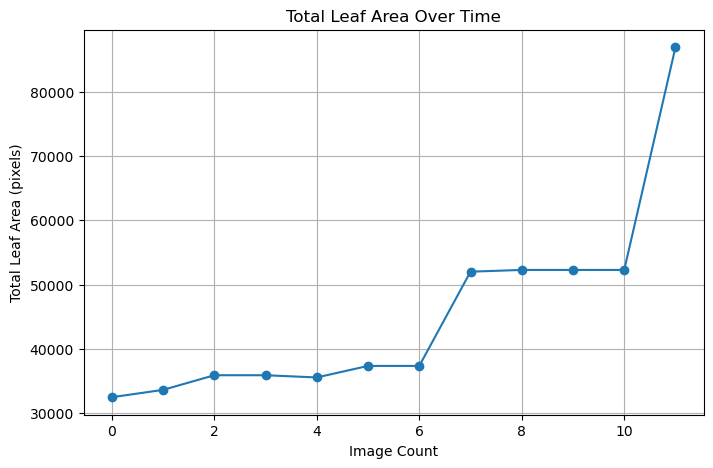

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 86905 pixels
Total area of leaves: 86905 pixels


Enter image path (or 'q' to quit):  top_view/a12.jpg


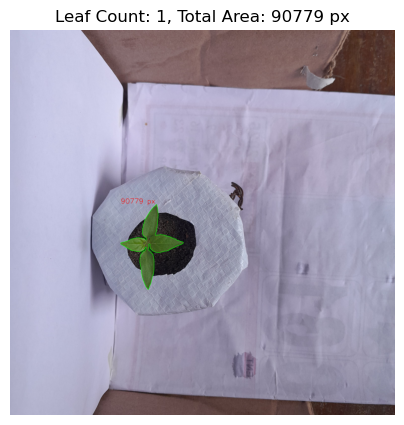

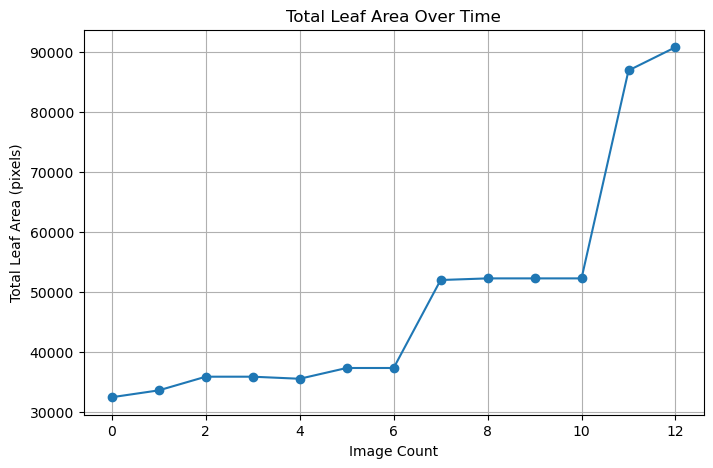

Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 90779 pixels
Total area of leaves: 90779 pixels


Enter image path (or 'q' to quit):  q


Total number of leaves detected: 1
Areas of individual leaves:
Leaf 1: 112584 pixels
Total area of leaves: 112584 pixels


Enter image path (or 'q' to quit):  q


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List to store total leaf areas
total_leaf_areas = []

while True:
    # Load the image
    image_path = input("Enter image path (or 'q' to quit): ")
    if image_path.lower() == 'q':
        break
    
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not load image.")
        continue
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for the color green in HSV space
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])

    # Create a mask to isolate green areas (likely leaves)
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Morphological operations to remove noise
    kernel = np.ones((3, 3), np.uint8)
    cleaned_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours of detected green areas
    contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter small contours (noise) by area
    min_leaf_area = 100
    leaf_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_leaf_area]

    # Count leaves and calculate total area
    leaf_count = len(leaf_contours)
    total_leaf_area = sum(cv2.contourArea(cnt) for cnt in leaf_contours)
    total_leaf_areas.append(total_leaf_area)

    # Draw contours and areas on the image
    img_with_green_leaves = img_rgb.copy()
    for cnt in leaf_contours:
        area = cv2.contourArea(cnt)
        cv2.drawContours(img_with_green_leaves, [cnt], -1, (0, 255, 0), 2)
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.putText(img_with_green_leaves, f'{int(area)} px', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.8, (255, 0, 0), 2)

    # Display results
    plt.figure(figsize=(5, 5))
    plt.imshow(img_with_green_leaves)
    plt.title(f'Leaf Count: {leaf_count}, Total Area: {int(total_leaf_area)} px')
    plt.axis('off')
    plt.show()

    # Plot the area progression
    plt.figure(figsize=(8, 5))
    plt.plot(total_leaf_areas, marker='o', linestyle='-')
    plt.title('Total Leaf Area Over Time')
    plt.xlabel('Image Count')
    plt.ylabel('Total Leaf Area (pixels)')
    plt.grid(True)
    plt.show()

    # Print the final leaf count and individual areas
    print(f"Total number of leaves detected: {leaf_count}")
    print("Areas of individual leaves:")
    for i, cnt in enumerate(leaf_contours, 1):
        area = cv2.contourArea(cnt)
        print(f"Leaf {i}: {int(area)} pixels")

    print(f"Total area of leaves: {int(total_leaf_area)} pixels")
